In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.pandas.set_option('display.max_columns',None)
dataset = pd.read_csv("NEW_ADVANCE_HOUSE.csv")
print(dataset.head())
#FOR FEATURE SELECTION
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

   Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  Overal

In [3]:
#DEPENDENT AND INDEPENDENT VARIABLE
Y = dataset[['SalePrice']]
X = dataset.drop(['Id','SalePrice'],axis=1)

In [4]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))    #select variable based on weight
feature_sel_model.fit(X,Y)
#PRINT(FEATURE_SEL_MODEL.GET_SUPPORT())

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [5]:
#COLLECTING SELECTED FEATURES
selected_feature = X.columns[feature_sel_model.get_support()]

In [6]:
print('no of feature',X.shape[1])
print('no of selected feature',len(selected_feature))
print(selected_feature)
#print(X_train[selected_feature].head())
X = X[selected_feature]

no of feature 82
no of selected feature 21
Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'SaleCondition'],
      dtype='object')


MODEL_BUILDING

In [7]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=1)


LINEAR REGRESSSION

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

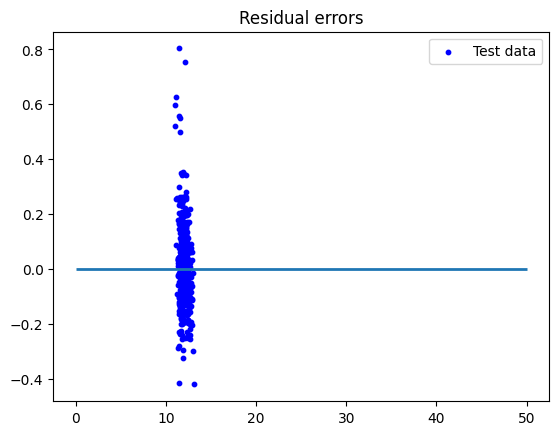

r2_score is 0.8842209001970078
root_mean_error is 0.14701634746775558
Cross Validation Scores:  [0.82783433 0.8981638  0.85400698 0.87561926 0.92455592]
Average CV Score:  0.8760360588569156
Number of CV Scores used in Average:  5


In [24]:
#PLOTTING RESIDUAL ERRORS IN TEST DATA
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test, color="blue", s=10, label='Test data')
#PLOTTING LINE FOR ZERO RESIDUAL ERROR
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()
from sklearn.metrics import r2_score

Y_pred = reg.predict(X_test)
print('r2_score is',r2_score(Y_test,Y_pred))
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test,Y_pred))
print('root_mean_error is',rms)
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(reg,X_train,np.ravel(Y_train), cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) #avrg cv score 87.6

DecisionTreeRegressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
#create a regressor object
regressor = DecisionTreeRegressor(random_state=0)

In [30]:
#fit the regressor with X and Y data
regressor.fit(X_train, Y_train)
from sklearn.metrics import r2_score
Y_pred = regressor.predict(X_test)
print('r2_score is',r2_score(Y_test,Y_pred))
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(regressor,X_train,np.ravel(Y_train), cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) #avrg cv score 87.9

r2_score is 0.7748174593350492
Cross Validation Scores:  [0.67465717 0.770889   0.66642325 0.74243713 0.78596612]
Average CV Score:  0.7280745346844701
Number of CV Scores used in Average:  5


In [8]:
# #RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
#CREATE REGRESSOR OBJECT
regressor = RandomForestRegressor(bootstrap=True,max_depth=40,max_features= 7,min_samples_leaf=1,min_samples_split =3,n_estimators=1000)

In [9]:
regressor.fit(X,np.ravel(Y))

RandomForestRegressor(max_depth=40, max_features=7, min_samples_split=3,
                      n_estimators=1000)

In [10]:
Y_pred = regressor.predict(X_test)

In [11]:
print(Y_pred)

[12.30249819 12.06731467 11.70642331 11.31595643 11.83592579 12.71402875
 12.60613493 11.91742934 12.24344922 12.43285439 12.06860498 11.10553272
 12.11799363 12.77771065 12.34574042 11.50209069 11.70754155 11.65842698
 12.39386077 11.78008828 11.69915212 11.6918134  12.4004072  12.75271786
 11.35748118 12.13094429 11.76842963 12.09012307 13.08937039 11.72396765
 11.62672019 11.65229616 11.7366923  11.2871057  11.94462497 12.81757832
 11.8024986  11.3997351  12.46566569 11.61369573 11.79755757 11.86643833
 11.4032455  11.78761784 12.09638397 12.01613968 11.68018824 12.02973289
 12.39443047 12.54616694 11.48607616 12.54507579 11.65240883 12.37631109
 12.1817536  11.59026922 11.70406943 12.07367029 11.72386419 12.10530781
 11.99247666 12.5149373  11.42085831 11.79140589 11.97897324 11.79645708
 11.80351411 12.3715015  11.96400479 11.90333882 12.21531986 11.62094572
 12.72863441 12.04871284 11.99257109 12.28760095 12.02258826 11.93761223
 13.11115062 12.11202835 12.13952251 11.78194825 11

CHECKING ACCURACY

In [31]:
from sklearn.metrics import r2_score
print('r2_score is',r2_score(Y_test,Y_pred))
from sklearn.metrics import mean_squared_error
from math import sqrt

r2_score is 0.7748174593350492


In [32]:
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print('root_mean_error is',rms)

root_mean_error is 0.20503023142797153


In [34]:
#CROSS VALIDATION
from sklearn.model_selection import KFold, cross_val_score

In [35]:
k_folds = KFold(n_splits = 5)

In [36]:
scores = cross_val_score(regressor,X_train,np.ravel(Y_train), cv = k_folds)

In [37]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))     # avg cv score 87.9

Cross Validation Scores:  [0.67465717 0.770889   0.66642325 0.74243713 0.78596612]
Average CV Score:  0.7280745346844701
Number of CV Scores used in Average:  5


XGBOOST REGRESSOR

In [43]:
from xgboost import XGBRegressor

xgb_r = XGBRegressor()

xgb_r.fit(X_train,Y_train)

Y_pred =xgb_r.predict(X_test)
from sklearn.metrics import r2_score
print('r2_score is',r2_score(Y_test,Y_pred)) # avg cv score 86.27

r2_score is 0.8797290754656258
